In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [3]:
us_abbrev_to_state = {v: k for k, v in us_state_to_abbrev.items()}

In [4]:
states_list = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [5]:
data_frame = pd.read_csv("T40.4_BWM.txt",delimiter="\t")
pd.set_option('display.max_rows', None)

We replace "Unreliable" by NaN.

In [6]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)

In [7]:
data_frame[((data_frame["Race"] == "White")) & (data_frame["State"] == "Iowa") &
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]

,Notes,State,State Code,Gender,Gender Code,Race,Race Code,Year,Year Code,Deaths,Population,Crude Rate
511,NaN,Iowa,19.0,Male,M,White,2106-3,2020.0,2020.0,103,1433214.0,7.2


In [8]:
CM2b_2020 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2w_2020 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2b_2019 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2w_2019 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2b_2018 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2018)]
CM2w_2018 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2018)]
CM2b_2017 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2017)]
CM2w_2017 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2017)]

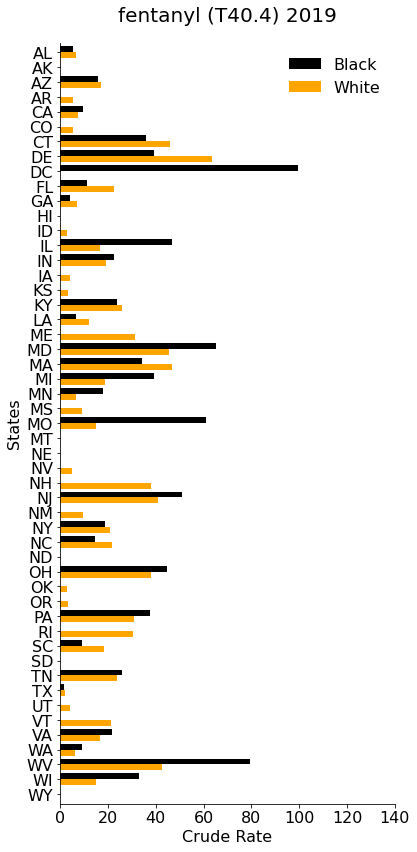

In [9]:
left19 = pd.DataFrame({"States": CM2w_2019["State"].astype(str), "White": CM2w_2019["Crude Rate"].astype(float)})
right19 = pd.DataFrame({"States": CM2b_2019["State"].astype(str), "Black": CM2b_2019["Crude Rate"].astype(float)})

result19 = pd.merge(left19, right19, on = "States")
result219 = pd.merge(left19, right19, how = 'right')
#result19 = result19.dropna(thresh=2)

left20 = pd.DataFrame({"States": CM2w_2020["State"].astype(str), "White": CM2w_2020["Crude Rate"].astype(float)})
right20 = pd.DataFrame({"States": CM2b_2020["State"].astype(str), "Black": CM2b_2020["Crude Rate"].astype(float)})

result20 = pd.merge(left20, right20, on = "States")
result220 = pd.merge(left20, right20, how = 'right')
#result20= result20.dropna(thresh=2)

result19.loc[::-1]
#print(resultF.loc[::-1])

df19 = pd.DataFrame(result19.loc[::-1])
#df19.index = df19['States']
state_codes_19 = pd.Series(df19["States"]).map(us_state_to_abbrev).to_numpy()
df19.index = state_codes_19

ax = df19.plot(kind='barh', figsize=(6, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=16)
plt.title('fentanyl (T40.4) 2019', fontsize = 20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 16)

#plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0,140))
plt.savefig('T40.4_2019_Race.svg')

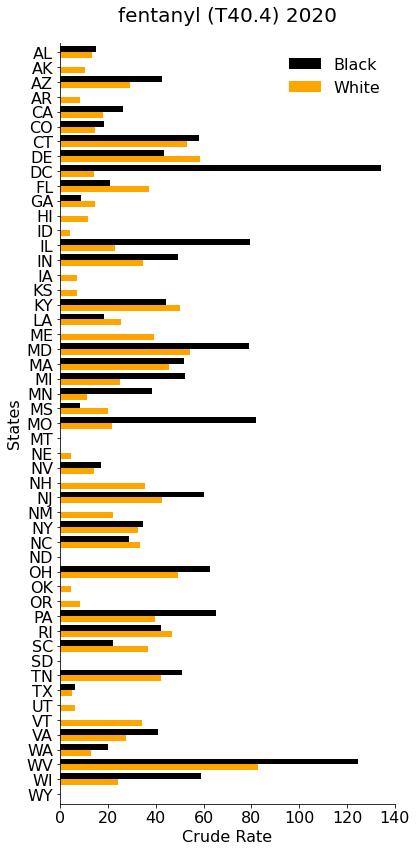

In [10]:
df20 = pd.DataFrame(result20.loc[::-1])
#df20.index = df20['States']
state_codes_20 = pd.Series(df20["States"]).map(us_state_to_abbrev).to_numpy()
df20.index = state_codes_20

ax2 = df20.plot(kind='barh', figsize=(6, 14),  color={"White": "orange", "Black": "black"}, width = 0.8, 
         fontsize=16)
plt.title('fentanyl (T40.4) 2020', fontsize = 20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
#plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 16)

plt.xlim((0,140))
plt.savefig('T40.4_2020_Race.svg')